In [63]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [64]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [65]:
data = pd.read_csv('advertising.csv')

In [66]:
data.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [68]:
data.describe()

,TV,radio,newspaper,sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


In [69]:
data.shape

(200, 4)

In [70]:
#####################
#Simple Linear Regression
#####################

In [71]:
X = data[['TV']] #Bunun data['TV'] yerine data[['TV']] olmasının sebebi ML algoritmalarının vektörlerle çalışmasıdır.
Y = data[['sales']]

In [72]:
model = LinearRegression().fit(X,Y) #Train test olmadan düz denedik

In [73]:
model.intercept_

array([7.03259355])

In [74]:
model.coef_

array([[0.04753664]])

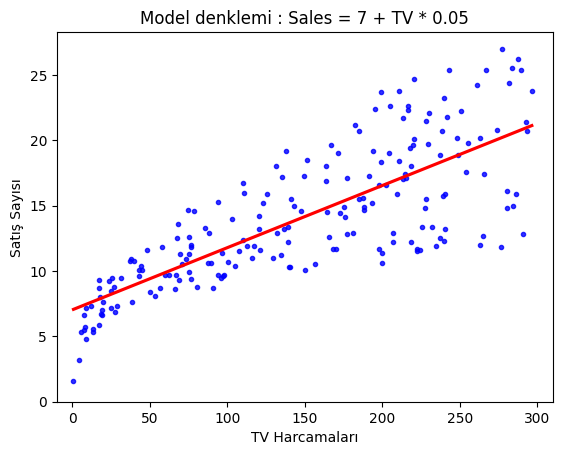

In [75]:
g = sns.regplot(x=X, y=Y, scatter_kws={'color' : 'b','s':9},
                ci=False, color='r')

g.set_title(f'Model denklemi : Sales = {round(model.intercept_[0])} + TV * {round(model.coef_[0][0], 2)}')
g.set_ylabel('Satış Sayısı')
g.set_xlabel('TV Harcamaları')
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [76]:
#######################
#Tahmin Başarısı
#######################
y_pred = model.predict(X)
mean_squared_error(Y, y_pred)

10.512652915656757

In [77]:
print(Y.mean()) #Bağımlı değişkenin MSE değerini yorumlarken ortlama ve standart sapmasına bak
print(Y.std())

sales   14.02
dtype: float64
sales   5.22
dtype: float64


In [78]:
np.sqrt(mean_squared_error(Y, y_pred))

3.2423221486546887

In [79]:
mean_absolute_error(Y, y_pred)

2.549806038927486

In [80]:
model.score(X, Y) #Bağımsız değişkenin bağımlı değişkeni açıklama yüzdesi
#NOT : Değişken sayısı arttıkça R^2 artmaya meyillidir.

0.611875050850071

In [82]:
X = data.drop(columns  ='sales', axis = 1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [86]:
model2 = LinearRegression().fit(X_train, y_train)

In [87]:
y_pred = model2.predict(X_test)

In [88]:
mean_squared_error(y_test, y_pred)

3.1740973539761033

In [89]:
mean_absolute_error(y_test, y_pred)

1.4607567168117603

In [90]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [91]:
print(rmse)

1.78159966153345


In [92]:
model2.coef_

array([[0.04472952, 0.18919505, 0.00276111]])

In [93]:
model2.intercept_

array([2.97906734])

In [94]:
model2.score(X_train, y_train)

0.8957008271017818

In [95]:
#10 katlı CV RMSE

np.mean(np.sqrt(-cross_val_score(model2,
                                 X,
                                 Y,
                                 cv = 10,
                                 scoring= 'neg_mean_squared_error')))

1.6913531708051797